# DataReader

<br><br>
<b>For daily candle chart data, it's more effective to load data from web, not the company API</b>

<b>Pandas Datareader provides methods to load data from web and make it into a dataframe</b>

In [1]:
import pandas_datareader.data as web

In [2]:
import datetime

In [3]:
start = datetime.datetime(2016, 2, 19)

In [4]:
end = datetime.datetime(2016, 3, 4)

In [5]:
gs = web.DataReader("078930.KS", "yahoo", start, end)

In [7]:
gs

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-19,51100,49950,50300,50600,301800,42082.011719
2016-02-22,50800,49850,50300,50400,153961,41915.683594
2016-02-23,53000,50800,50800,52800,431934,43911.664062
2016-02-24,53500,51900,52000,53500,259616,44493.824219
2016-02-25,54700,52700,53900,53900,170839,44826.488281
2016-02-26,54500,53200,54300,53300,159453,44327.496094
2016-02-29,53900,52800,53000,53000,154692,44077.996094
2016-03-02,55200,53500,53900,55100,229999,45824.488281
2016-03-03,55800,54300,55300,55000,217063,45741.312500


In [8]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2016-02-19 to 2016-03-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       10 non-null     int64  
 1   Low        10 non-null     int64  
 2   Open       10 non-null     int64  
 3   Close      10 non-null     int64  
 4   Volume     10 non-null     int64  
 5   Adj Close  10 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 560.0 bytes


<br><br>
<b>w/o period data, it will return data from 2010.01.01 to today</b>

In [11]:
gs = web.DataReader("078930.KS", "yahoo")

In [13]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1222 entries, 2016-08-16 to 2021-08-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1222 non-null   float64
 1   Low        1222 non-null   float64
 2   Open       1222 non-null   float64
 3   Close      1222 non-null   float64
 4   Volume     1222 non-null   float64
 5   Adj Close  1222 non-null   float64
dtypes: float64(6)
memory usage: 66.8 KB


<br><br>
<b>so many data that we can draw a graph</b>

In [15]:
import matplotlib.pyplot as plt

In [16]:
plt.plot(gs['Adj Close'])

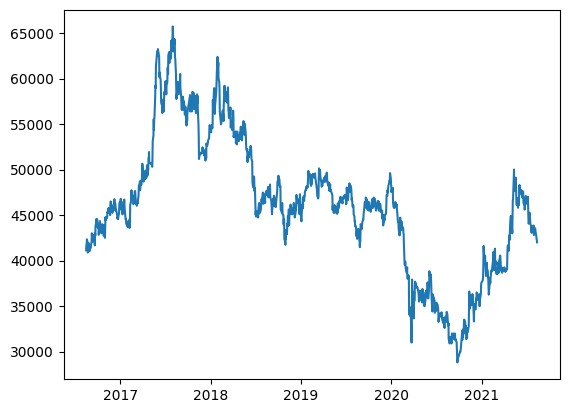

In [18]:
plt.show()

<br><br>

### Moving Average w/ Pandas

<br><br>


In [25]:
import pandas as pd

In [26]:
import pandas_datareader.data as web

In [27]:
gs = web.DataReader("078930.KS", "yahoo", "2014-01-01", "2016-03-06")

<br><br>
<b>check the dataframe w/ tail method</b>

In [28]:
gs.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-26,54500.0,53200.0,54300.0,53300.0,159453.0,44327.496094
2016-02-29,53900.0,52800.0,53000.0,53000.0,154692.0,44077.996094
2016-03-02,55200.0,53500.0,53900.0,55100.0,229999.0,45824.488281
2016-03-03,55800.0,54300.0,55300.0,55000.0,217063.0,45741.312500
2016-03-04,54800.0,53200.0,54700.0,54200.0,237934.0,45075.992188


<br><br>
<b>get ma5</b>

In [29]:
ma5 = gs["Adj Close"].rolling(window=5).mean()

In [30]:
type(ma5)

pandas.core.series.Series

In [31]:
ma5.tail(10)

Date
2016-02-19    42007.163281
2016-02-22    42082.012500
2016-02-23    42464.576562
2016-02-24    42946.939063
2016-02-25    43445.934375
2016-02-26    43895.031250
2016-02-29    44327.493750
2016-03-02    44710.058594
2016-03-03    44959.556250
2016-03-04    45009.457031
Name: Adj Close, dtype: float64

In [35]:
gs.insert(len(gs.columns), "MA5", ma5)

In [36]:
gs.tail(5)

,High,Low,Open,Close,Volume,Adj Close,MA5
Date,,,,,,,
2016-02-26,54500.0,53200.0,54300.0,53300.0,159453.0,44327.496094,43895.031250
2016-02-29,53900.0,52800.0,53000.0,53000.0,154692.0,44077.996094,44327.493750
2016-03-02,55200.0,53500.0,53900.0,55100.0,229999.0,45824.488281,44710.058594
2016-03-03,55800.0,54300.0,55300.0,55000.0,217063.0,45741.312500,44959.556250
2016-03-04,54800.0,53200.0,54700.0,54200.0,237934.0,45075.992188,45009.457031


In [37]:
import matplotlib.pyplot as plt

In [40]:
plt.plot(gs.index, gs['Adj Close'], label="Adj Close")

In [41]:
plt.plot(gs.index, gs['MA5'], label="MA5")

<br><br>
<b>Let's add legend too,  
loc (location) will be best possible</b>

In [42]:
plt.legend(loc='best')

In [43]:
plt.grid()

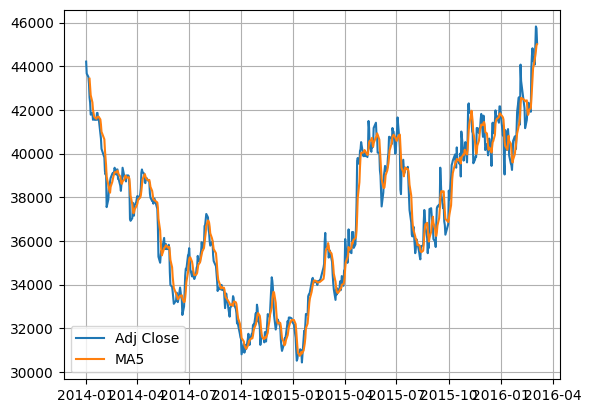

In [44]:
plt.show()

<br><br>
<b>you can do same for MA20, 60 and 120</b>